In [22]:
import torch
from torch.utils.data import Dataset
from glob import glob

In [3]:
# get gpu device
device = torch.device("cuda")
print(torch.cuda.get_device_properties(device))

_CudaDeviceProperties(name='NVIDIA GeForce RTX 4090', major=8, minor=9, total_memory=24217MB, multi_processor_count=128)


In [4]:
# get i/o filepaths
input_paths = glob("/home/peter/data/split/RF_*")
output_path = "/home/peter/data/split/aeration1.pt"
print(len(input_paths))

4500


False

In [7]:
x0 = torch.load(input_paths[0])
y = torch.load(output_path)
y.shape

torch.Size([4500, 1025])

In [9]:
x0.shape

torch.Size([1509, 64, 128])

In [1]:
# viz
from datasets import UltrasoundDataset

ds = UltrasoundDataset()

In [4]:
x, y = ds[0]
print(x.shape, y.shape)

torch.Size([1509, 64, 128]) torch.Size([1025])


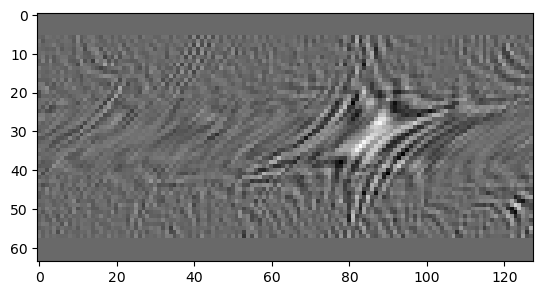

In [33]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def animate(frame):
    plt.clf()
    plt.imshow(x[frame], cmap="gray")
    # ax.imshow(x[frame], cmap="gray")
    # ax.axis("off")

# fig, ax = plt.subplots()
# ani = FuncAnimation(fig, animate, frames=1509, interval=10)
# ani.save("animation.mp4", fps=60)
# plt.show()
animate(10)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots()

# Set limits for the plot
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.5, 1.5)

# Create an empty line object
line, = ax.plot([], [], lw=2)

# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# Animation function: update the plot for each frame
def animate(i):
    x = np.linspace(0, 2*np.pi, 1000)
    y = np.sin(x + 0.1*i)  # Vary the phase for animation
    line.set_data(x, y)
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=50, blit=True)


ani.save("test_1.mp4")
# Display the animation
plt.show()

In [44]:
a = torch.rand([2, 4])
b = torch.rand([14, 4])
print(a.shape, b.shape)
torch.cat([a, b], axis=0).shape

torch.Size([2, 4]) torch.Size([14, 4])


torch.Size([16, 4])

In [332]:
# output
import torch.nn as nn
import torch.nn.functional as F

l1 = nn.Conv2d(64, 1, kernel_size=1)
l2 = nn.AvgPool2d(2, stride=2)
l3 = nn.AvgPool1d(2, stride=2)

In [336]:
x = torch.rand(64, 64, 128)
x = l1(x)
print(x.shape)
x = l2(x)
x = x.flatten().unsqueeze(0)
print(x.shape)

x = l3(x)
x = x.squeeze()
x = F.pad(x, (0, 1), "constant", 0)
print(x.shape)

torch.Size([1, 64, 128])
torch.Size([1, 2048])
torch.Size([1025])


In [273]:
32 * 32

1024

In [322]:
a = torch.rand((4))
a.shape

torch.Size([4])

In [323]:
a

tensor([0.9843, 0.7796, 0.7917, 0.9566])

In [324]:
a = 
a.shape

torch.Size([5])

In [325]:
a

tensor([0.9843, 0.7796, 0.7917, 0.9566, 0.0000])